10.138.120.66:3128_1mb  download    0.069522
10.138.3.162:3128_1mb   download    0.049900
10.138.57.2:3128_1mb    download    0.031478
10.139.40.122:3128_1mb  download    0.012089
10.139.40.85:3128_1mb   download    0.019133
dtype: float64


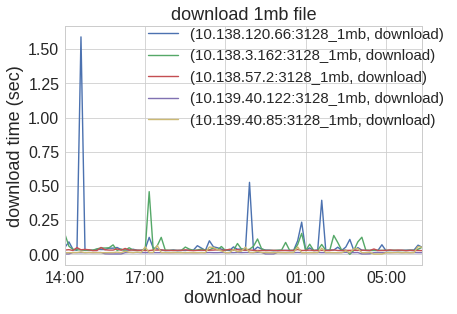

10.138.120.66:3128_10mb   download    0.237083
10.138.3.162:3128_10mb    download    0.223139
10.138.57.2:3128_10mb     download    0.211750
10.138.85.130:3128_10mb   download    1.357389
10.139.17.4:3128_10mb     download    1.271417
10.139.37.194:3128_10mb   download    0.402111
10.139.40.122:3128_10mb   download    0.116694
10.139.40.85:3128_10mb    download    0.124889
10.228.193.210:3128_10mb  download    0.464222
dtype: float64


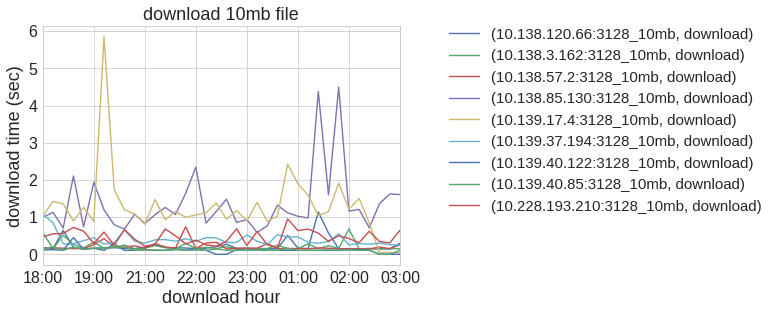

10.138.120.66:3128_100mb   download     2.392278
10.138.3.162:3128_100mb    download     2.305861
10.138.57.2:3128_100mb     download     1.971694
10.138.85.130:3128_100mb   download    15.184694
10.139.17.4:3128_100mb     download    12.789583
10.139.37.194:3128_100mb   download     3.088556
10.139.40.122:3128_100mb   download     1.251806
10.139.40.85:3128_100mb    download     1.571500
10.228.193.210:3128_100mb  download     2.596528
dtype: float64


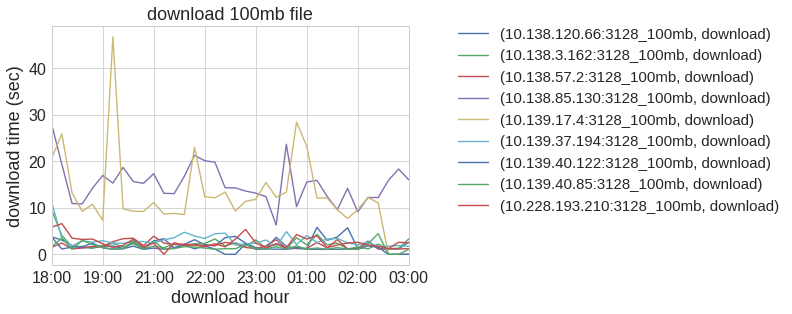

10.138.120.66:3128_ted   download    0.607917
10.138.3.162:3128_ted    download    0.637944
10.138.57.2:3128_ted     download    0.640083
10.138.85.130:3128_ted   download    0.960639
10.139.17.4:3128_ted     download    1.732972
10.139.37.194:3128_ted   download    0.677944
10.139.40.122:3128_ted   download    0.519111
10.139.40.85:3128_ted    download    0.610583
10.228.193.210:3128_ted  download    0.648472
dtype: float64


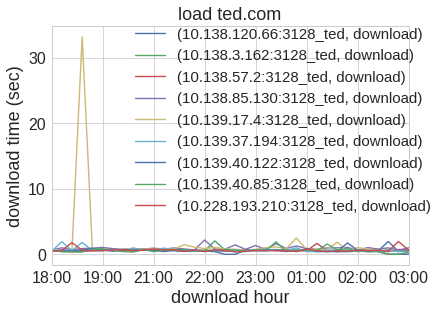

10.138.120.66:3128_vevo   download    0.278778
10.138.3.162:3128_vevo    download    0.553389
10.138.57.2:3128_vevo     download    0.249111
10.138.85.130:3128_vevo   download    1.303333
10.139.17.4:3128_vevo     download    0.886444
10.139.37.194:3128_vevo   download    0.359889
10.139.40.122:3128_vevo   download    0.285889
10.139.40.85:3128_vevo    download    0.765139
10.228.193.210:3128_vevo  download    0.572889
dtype: float64


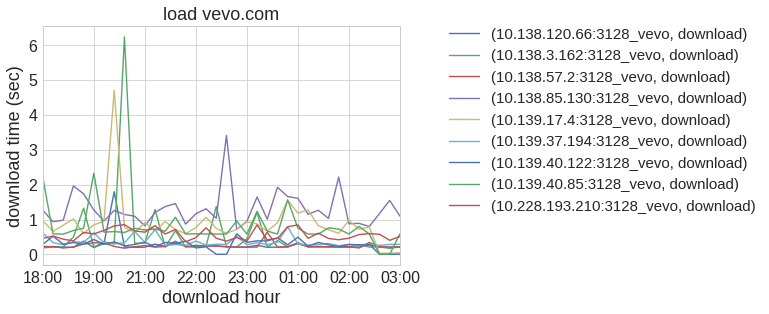

10.138.120.66:3128_slideshare   download    2.147639
10.138.3.162:3128_slideshare    download    2.159139
10.138.57.2:3128_slideshare     download    2.069028
10.138.85.130:3128_slideshare   download    2.401583
10.139.17.4:3128_slideshare     download    3.076611
10.139.37.194:3128_slideshare   download    2.359944
10.139.40.122:3128_slideshare   download    1.900472
10.139.40.85:3128_slideshare    download    2.139611
10.228.193.210:3128_slideshare  download    2.309167
dtype: float64


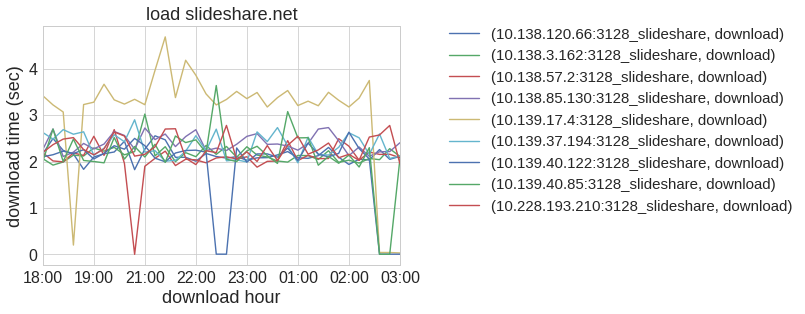

In [121]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

EXP_1NAME = "inputs/lluc/8clients/74/1mb"
EXP_10NAME = "inputs/lluc/8clients/74/10mb"
EXP_100NAME = "inputs/lluc/8clients/74/100mb"
EXP_SLIDENAME = "inputs/lluc/8clients/74/slideshare"
EXP_VEVNAME = "inputs/lluc/8clients/74/vevo"
EXP_TEDNAME = "inputs/lluc/8clients/74/ted"

MAX_ROUNDS = 70
MAX_YVAL = 5

RESULTS_DIR = os.path.join( os.getcwd(),'results')
INPUT_DIR = os.path.join( os.getcwd(), EXP_1NAME)

headers = ['date', 'download', 'code'] 
dtypes = [pd.datetime, float, float]

##SET SEABORN STYLE
sns.set_style("whitegrid")
sns.set_context("paper")

##SET MATPLOTLIB STYLE
TICKS_FONTSIZE = 16
LABEL_FONTSIZE=18
LEGEND_FONTSIZE=15
linestyles = (':','-','.','--')

mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE 
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['legend.fontsize'] = TICKS_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['axes.titlesize'] = LABEL_FONTSIZE
mpl.rcParams['font.size'] = LABEL_FONTSIZE
plt.rc('legend',**{'fontsize':LEGEND_FONTSIZE})


#Read input files from the directory and returns DataTable object in a combined list
def read_inputs(exp_name, columns):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), exp_name)
    nodes = [f for f in os.listdir(INPUT_DIR) if os.path.isfile(os.path.join(INPUT_DIR, f))]
    #Load results from each node
    nodes_results = {}
    for node in nodes:
        f = os.path.join(INPUT_DIR,node)
        try:
            nodes_results[node] = pd.read_csv(f,  usecols=columns,
                                              parse_dates=['date'], index_col=0)            
            nodes_results[node] = nodes_results[node].replace('None',np.nan)
        except Exception:
            print(node, 'EXception')
    return nodes_results

def plot_var_per_round(results, var):
    """Plot the median acrros nodes of a variable"""
    median = getMedianDF(results,var)
    #Create new figure
    fig = plt.figure()
    #Print the plot
    median.plot()
    #Modify parameters
    plt.ylabel(var)
    #plt.xlabel('Date')
    plt.xlim(0,MAX_ROUNDS)
    plt.show()

# Plot results to the separately
def plot_separately(results,y_label, legends):
    df = pd.concat(results,axis=1)
    df.index = df.index.to_series().dt.strftime('%H:00')
    ax = df.plot(title=y_label)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    print(df.mean())
    ax.set_xlabel('download hour')
    ax.set_ylabel('download time (sec)')
    #plt.ylim(0,0.25)
    plt.show()
    



if __name__ == '__main__':
    nodes_results1 = read_inputs(EXP_1NAME,["date", "download"])
    nodes_results2 = read_inputs(EXP_10NAME,["date", "download"])
    nodes_results3 = read_inputs(EXP_100NAME,["date", "download"])
    nodes_results4 = read_inputs(EXP_TEDNAME,["date", "download"])
    nodes_results5 = read_inputs(EXP_VEVNAME, ["date", "download"])
    nodes_results6 = read_inputs(EXP_SLIDENAME, ["date", "download"])
    plot_separately(nodes_results1, 'download 1mb file', list(nodes_results1))
    plot_separately(nodes_results2, 'download 10mb file', list(nodes_results2))    
    plot_separately(nodes_results3, 'download 100mb file', list(nodes_results3))
    plot_separately(nodes_results4, 'load ted.com', list(nodes_results3))
    plot_separately(nodes_results5, 'load vevo.com', list(nodes_results3))
    plot_separately(nodes_results6, 'load slideshare.net', list(nodes_results3))

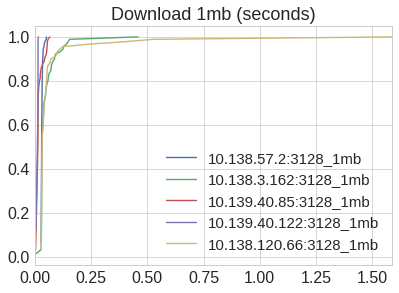

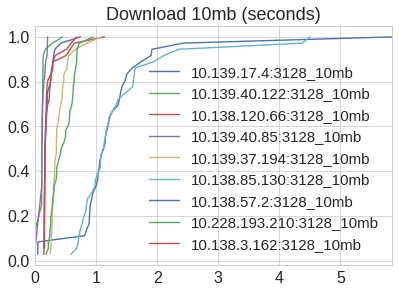

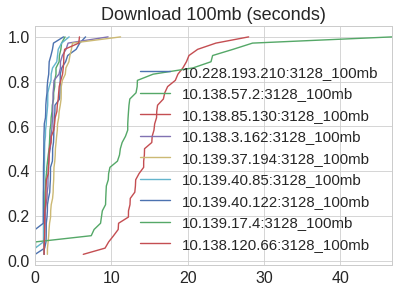

In [122]:
def plot_ecdf(results, var, title):
    """Plot the ECDF of the median accross the nodes of a variable"""
    lbl = []
    for v in var:
        series = pd.Series(results[v].download)
        ecdf = getECDF(results[v])
        ecdf.plot(title=title)
        lbl.append(v)
    plt.legend(lbl, loc = 'lower right')
    
    #plt.xlim(0,1)
    plt.show()
    
######### Assistant functions###############

def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.download.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf


if __name__ == '__main__':
    nodes_results1 = read_inputs(EXP_1NAME,["date", "download"])
    nodes_results2 = read_inputs(EXP_10NAME,["date", "download"])
    nodes_results3 = read_inputs(EXP_100NAME,["date", "download"])
    
    
    plot_ecdf(nodes_results1, list(nodes_results1), 'Download 1mb (seconds)')
    plot_ecdf(nodes_results2, list(nodes_results2), 'Download 10mb (seconds)')
    plot_ecdf(nodes_results3, list(nodes_results3), 'Download 100mb (seconds)')

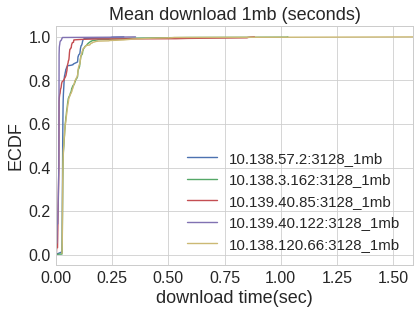

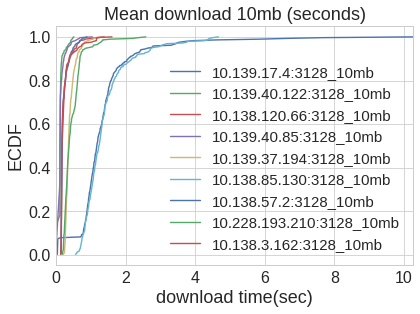

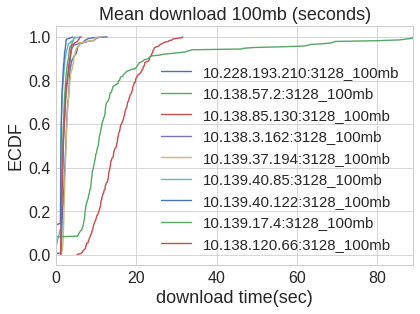

In [124]:
INPUT_DIR = "inputs/lluc/8clients/"

def plot_mean_ecdf(test,inputs, title):
    results = {}
    for client in inputs:
        nodes = read_inputs(INPUT_DIR+client+'/'+test, ["date", "download","size"])
        keys = list(nodes)
        for key in keys:
            if key in results.keys():
                results[key] = pd.concat([results[key], pd.DataFrame(nodes[key].download)])
            else:
                results[key] = pd.DataFrame(nodes[key].download)
    lbl = []
    for key in list(results):
        results[key].index = pd.to_datetime(results[key].index)
        ecdf = getECDF(results[key])
        ax = ecdf.plot(title=title)
        ax.set_ylabel('ECDF')
        ax.set_xlabel('download time(sec)')
        lbl.append(key)
    
    plt.legend(lbl, loc = 'lower right')
    #lt.xlim(0,3)
    plt.show()


def plot_mean(test,inputs, title):
    results = {}
    for client in inputs:
        nodes = read_inputs(INPUT_DIR+'/'+client+'/'+test, ["date", "download"])
        keys = list(nodes)
        for key in keys:
            if key in results.keys():
                results[key] = pd.concat([results[key], pd.DataFrame(nodes[key].download)])
            else:
                results[key] = pd.DataFrame(nodes[key].download)
    
    df = pd.concat(results,axis=1)
    df.plot(subplots=True)
    plt.show()
    

    
if __name__ == '__main__':
    inputs = ['74','77','78','115','116','118','180','181']
    plot_mean_ecdf('1mb', inputs, 'Mean download 1mb (seconds)')
    plot_mean_ecdf('10mb', inputs, 'Mean download 10mb (seconds)')
    plot_mean_ecdf('100mb', inputs, 'Mean download 100mb (seconds)')
    
    #plot_mean('1mb', inputs, 'Mean download 1mb (seconds)')
    #plot_mean('10mb', inputs, 'Mean download 10mb (seconds)')
    #plot_mean('100mb', inputs, 'Mean download 10mb (seconds)')

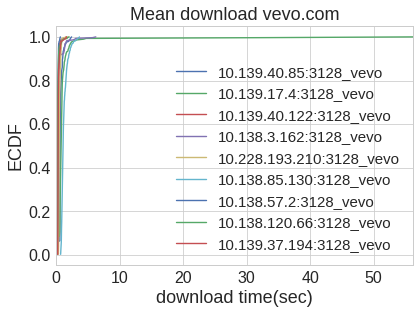

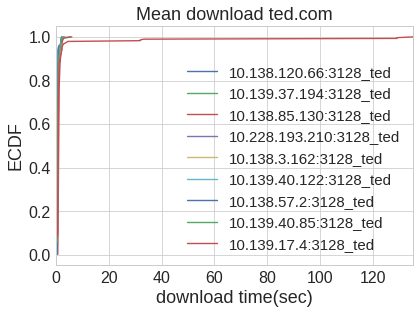

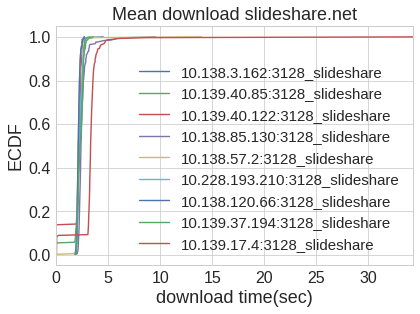

In [125]:
#def plot_download_websit():
    
if __name__ == '__main__':
    inputs = ['74','77','78','115','116','118','180','181']
    plot_mean_ecdf('vevo', inputs, 'Mean download vevo.com')
    plot_mean_ecdf('ted', inputs, 'Mean download ted.com')
    plot_mean_ecdf('slideshare', inputs, 'Mean download slideshare.net')